In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
ps = PorterStemmer()
tf=TfidfVectorizer(max_features=5000)
GNB=GaussianNB()
MNB=MultinomialNB()
%matplotlib inline

In [2]:
df=pd.read_csv('FAKE_NEWS.csv')
df.head(5)

,Unnamed: 0,id,title,author,text,label
0,0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,1,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
2,2,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
3,3,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1
4,4,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori...",1


In [4]:
corpus=[]
for i in range(0,len(df)):
    review=re.sub('[^a-zA-z]'," ",df['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [5]:
X=tf.fit_transform(corpus).toarray()

In [9]:
count_X = pd.DataFrame(X, columns=tf.get_feature_names())

In [22]:
count_X=count_X.drop(['____', '_____'], axis=1)

In [26]:
X=count_X.to_numpy()

In [28]:
X.shape

(4575, 4998)

In [29]:
y=df['label']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [34]:
def plot_confusion_matrix(cm, classes,normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [32]:
GNB.fit(X_train, y_train)
pred = GNB.predict(X_test)

accuracy:   0.687
Confusion matrix, without normalization


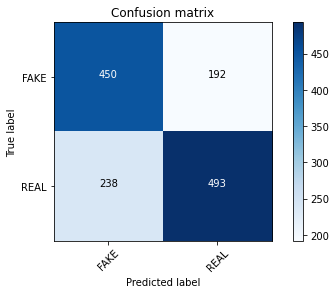

In [38]:
import itertools
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [40]:
MNB.fit(X_train, y_train)
pred_MNB= MNB.predict(X_test)

accuracy:   0.735
Confusion matrix, without normalization


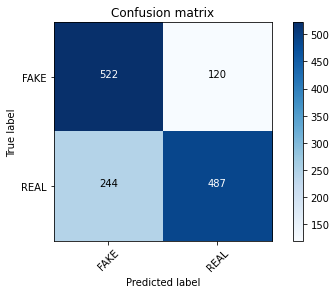

In [41]:
import itertools
score = accuracy_score(y_test, pred_MNB)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred_MNB)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [43]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy:   0.840
Confusion matrix, without normalization


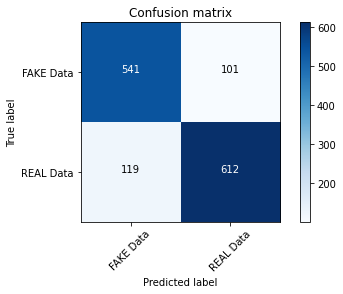

In [45]:
linear_clf.fit(X_train, y_train)
pred_clf= linear_clf.predict(X_test)
score = accuracy_score(y_test, pred_clf)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred_clf)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])